<a href="https://colab.research.google.com/github/alammobaDar/CCADMACL_PROJECT_COM231ML/blob/main/CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dependencies

In [21]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Load Dataset

In [22]:
drive.mount("/content/drive")

path = "/content/drive/My Drive/Datasets/flows_sampled_2000(1).csv"

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df.head()

,packet_count,byte_count,avg_pkt_len,std_pkt_len,start_time,end_time,avg_iat,std_iat,flow_duration,ip_src,ip_dst,src_port,dst_port,ip_proto
0,6,344.0,57.333333,8.164966,1.744194e+09,1.744194e+09,1.494267,1.041341,7.471334,167.89.182.126,202.24.165.141,45746.0,53609.0,6.0
1,6,612.0,102.000000,100.901933,1.744194e+09,1.744194e+09,3.715824,8.282814,18.579121,163.164.144.165,104.45.240.24,64712.0,443.0,6.0
2,11,8787.0,798.818182,1320.119905,1.744194e+09,1.744194e+09,0.189680,0.311778,1.896796,161.117.139.230,150.67.110.222,443.0,48946.0,6.0
3,5,391.0,78.200000,23.069460,1.744194e+09,1.744194e+09,0.119083,0.137180,0.476333,51.217.99.57,203.178.181.27,52624.0,53.0,6.0
4,10,1937.0,193.700000,257.784169,1.744194e+09,1.744194e+09,0.339914,0.263165,3.059223,133.28.231.176,91.249.139.99,3389.0,15327.0,6.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   packet_count   2000 non-null   int64  
 1   byte_count     2000 non-null   float64
 2   avg_pkt_len    2000 non-null   float64
 3   std_pkt_len    2000 non-null   float64
 4   start_time     2000 non-null   float64
 5   end_time       2000 non-null   float64
 6   avg_iat        2000 non-null   float64
 7   std_iat        2000 non-null   float64
 8   flow_duration  2000 non-null   float64
 9   ip_src         2000 non-null   object 
 10  ip_dst         2000 non-null   object 
 11  src_port       2000 non-null   float64
 12  dst_port       2000 non-null   float64
 13  ip_proto       2000 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 218.9+ KB


In [25]:
df.describe()

,packet_count,byte_count,avg_pkt_len,std_pkt_len,start_time,end_time,avg_iat,std_iat,flow_duration,src_port,dst_port,ip_proto
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,37.075000,2.148685e+04,271.333409,246.971990,1.744194e+09,1.744194e+09,1.620718,1.817643,18.019611,27967.226500,25252.236000,11.500000
std,133.743434,2.800133e+05,442.112937,433.017930,1.928422e+01,1.834439e+01,2.694333,3.160359,22.154922,24969.878876,25456.453317,5.501376
min,5.000000,2.700000e+02,54.000000,0.000000,1.744194e+09,1.744194e+09,0.000005,0.000009,0.000036,22.000000,3.000000,6.000000
25%,7.000000,7.040000e+02,87.095455,5.877441,1.744194e+09,1.744194e+09,0.026292,0.022108,0.236664,443.000000,443.000000,6.000000
50%,10.000000,1.940500e+03,138.000000,107.715307,1.744194e+09,1.744194e+09,0.309377,0.317093,6.025172,27776.000000,12254.500000,11.500000
75%,18.000000,6.272500e+03,303.291176,402.750105,1.744194e+09,1.744194e+09,1.818539,2.308442,35.274692,53365.750000,52816.750000,17.000000
max,1925.000000,7.840028e+06,9881.685121,6498.536685,1.744194e+09,1.744194e+09,15.015378,24.252239,62.461515,65515.000000,65527.000000,17.000000


In [26]:
df.isna().sum()

,0
packet_count,0
byte_count,0
avg_pkt_len,0
std_pkt_len,0
start_time,0
end_time,0
avg_iat,0
std_iat,0
flow_duration,0
ip_src,0


In [27]:
# Remove object types

X = df.drop(["ip_src", "ip_dst"], axis=1)

## Initial visualisation of the dataset

<Axes: >

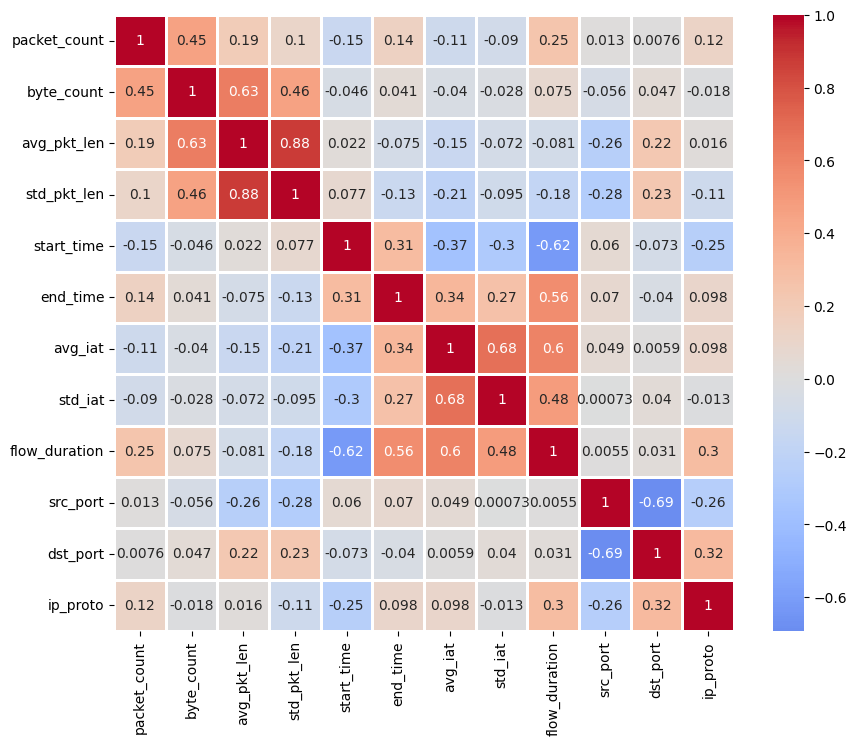

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap="coolwarm", center=0, annot=True, linewidths=2)

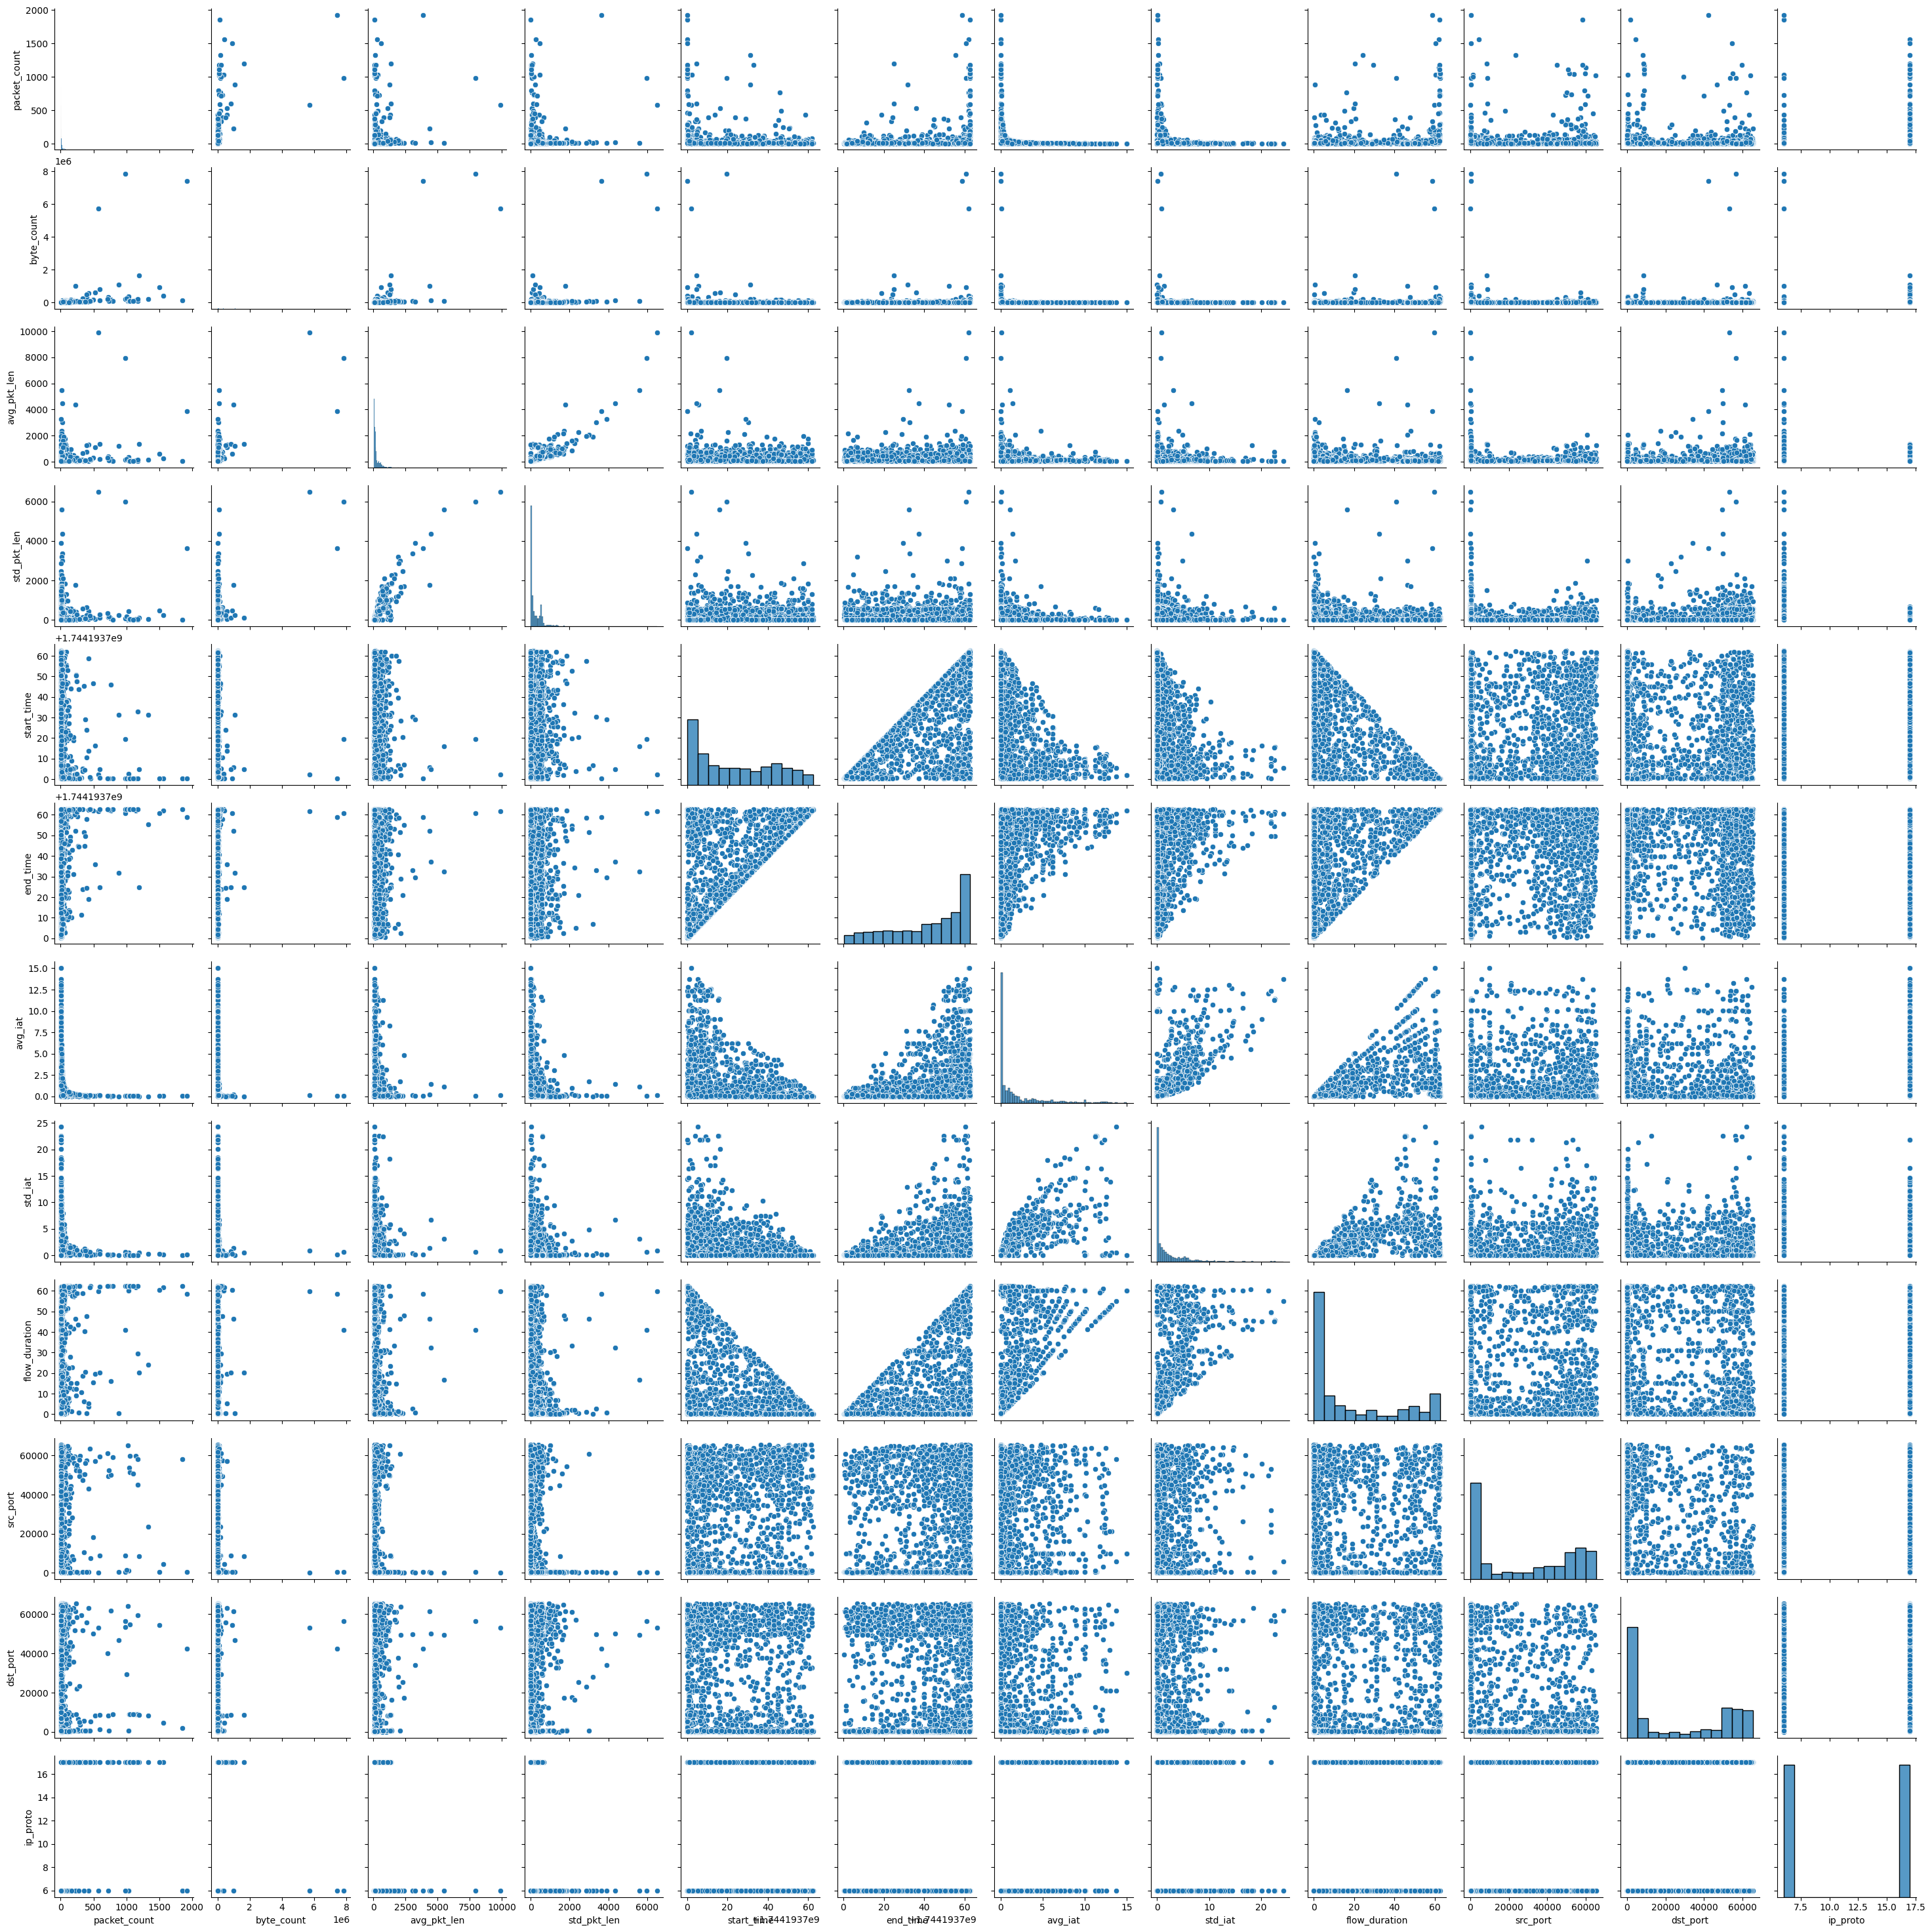

In [29]:
sns.pairplot(df)

## Scale Data

### Standard Scaler

In [30]:
sscaler = StandardScaler()
X_sscaled = sscaler.fit_transform(X)

X_sscaled = pd.DataFrame(X_sscaled, columns=X.columns)

In [31]:
X_sscaled.head()

,packet_count,byte_count,avg_pkt_len,std_pkt_len,start_time,end_time,avg_iat,std_iat,flow_duration,src_port,dst_port,ip_proto
0,-0.232406,-0.075525,-0.484160,-0.551632,1.396269,0.892646,-0.046944,-0.245699,-0.476233,0.712187,1.114211,-1.0
1,-0.232406,-0.074568,-0.383105,-0.337415,-0.774015,-0.783162,0.777792,2.046220,0.025261,1.471932,-0.974819,-1.0
2,-0.195012,-0.045366,1.193398,2.478919,-0.592812,-1.502299,-0.531262,-0.476605,-0.727913,-1.102573,0.930989,-1.0
3,-0.239885,-0.075358,-0.436951,-0.517204,0.595920,-0.330118,-0.557470,-0.531865,-0.792044,0.987708,-0.990143,-1.0
4,-0.202490,-0.069835,-0.175640,0.024976,-0.406714,-1.243284,-0.475489,-0.491990,-0.675431,-0.984561,-0.389988,-1.0


### Robust Scaler

In [32]:
rscaler = RobustScaler()
X_rscaled = rscaler.fit_transform(X)

X_rscaled = pd.DataFrame(X_rscaled, columns=X.columns)

In [33]:
X_rscaled.head()

,packet_count,byte_count,avg_pkt_len,std_pkt_len,start_time,end_time,avg_iat,std_iat,flow_duration,src_port,dst_port,ip_proto
0,-0.363636,-0.286702,-0.373119,-0.250837,0.853644,0.371991,0.661120,0.316772,0.041274,0.339552,0.789604,-0.5
1,-0.363636,-0.238574,-0.166516,-0.017168,-0.315062,-0.632271,1.900658,3.484058,0.358295,0.697923,-0.225523,-0.5
2,0.090909,1.229505,3.056574,3.054896,-0.217483,-1.063229,-0.066786,-0.002325,-0.117826,-0.516470,0.700570,-0.5
3,-0.454545,-0.278262,-0.276601,-0.213282,0.422653,-0.360776,-0.106176,-0.078691,-0.158366,0.469515,-0.232970,-0.5
4,0.000000,-0.000629,0.257637,0.378128,-0.117269,-0.908009,0.017038,-0.023587,-0.084649,-0.460804,0.058665,-0.5


# PCA IMPLEMENTATION

In [71]:
def reduce_dimensions(X, n_components):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)

    print("Number of components kept:", pca.n_components_)
    print("Explained variance ratio:", pca.explained_variance_ratio_)
    print("Total variance retained:", sum(pca.explained_variance_ratio_))

    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)
    print(loading_matrix)

    return X_reduced

def visualize_reduced_data(X, X_reduced):
    plt.figure(figsize=(10, 8))
    sns.heatmap(X.corr(), annot=True, cmap="coolwarm")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    ax1.boxplot(X)
    ax1.set_title("Box Plot of scaled data")
    ax1.set_xlabel("Features")
    ax1.set_ylabel("Values")

    ax2.scatter(X_reduced[:,0], X_reduced[:,1])
    ax2.set_title("Scatter plot of reduced data")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.show()

## PCA (Standard Scaler)

In [47]:
X_sscaled_reduced= reduce_dimensions(X_sscaled, 2)

Number of components kept: 2
Explained variance ratio: [0.24543853 0.21522296]
Total variance retained: 0.46066149258255507
                    PC1       PC2
packet_count  -0.073746  0.411380
byte_count    -0.351679  0.587807
avg_pkt_len   -0.595884  0.650528
std_pkt_len   -0.651050  0.534177
start_time    -0.436708 -0.426562
end_time       0.441870  0.191343
avg_iat        0.753021  0.312987
std_iat        0.634131  0.324168
flow_duration  0.745992  0.529724
src_port       0.240834 -0.500794
dst_port      -0.171766  0.516713
ip_proto       0.198847  0.375070


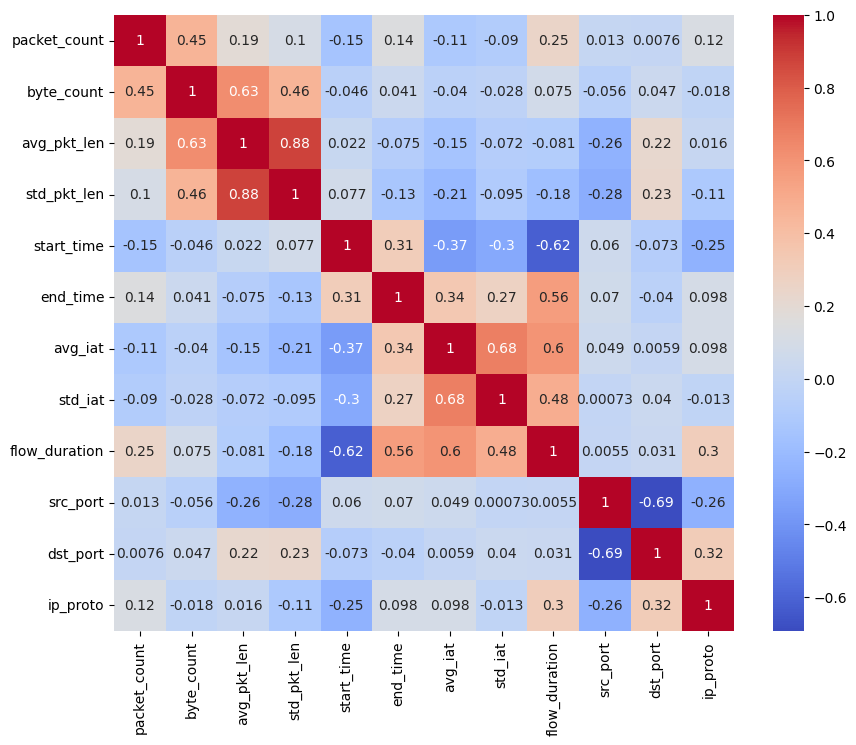

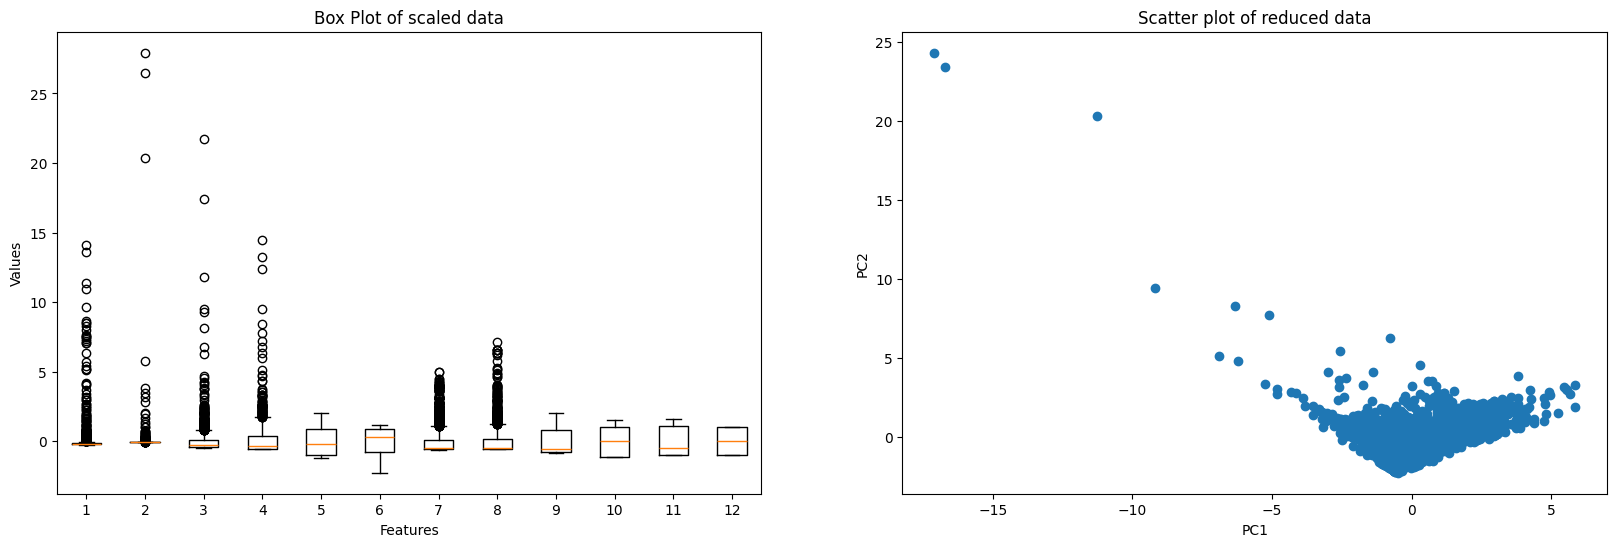

In [72]:
visualize_reduced_data(X_sscaled, X_sscaled_reduced)

## PCA (Robust Scaler)

In [49]:
X_rscaled_reduced = reduce_dimensions(X_rscaled, 2)

Number of components kept: 2
Explained variance ratio: [0.95338627 0.04317434]
Total variance retained: 0.9965606112967798
                     PC1        PC2
packet_count    5.783201  10.694919
byte_count     50.270327  -1.223139
avg_pkt_len     1.281417  -0.249053
std_pkt_len     0.495082  -0.141836
start_time     -0.026822  -0.076984
end_time        0.026761   0.083106
avg_iat        -0.064889  -0.158962
std_iat        -0.042185  -0.120753
flow_duration   0.050782   0.151250
src_port       -0.025985   0.021508
dst_port        0.022787  -0.008609
ip_proto       -0.007047   0.074702


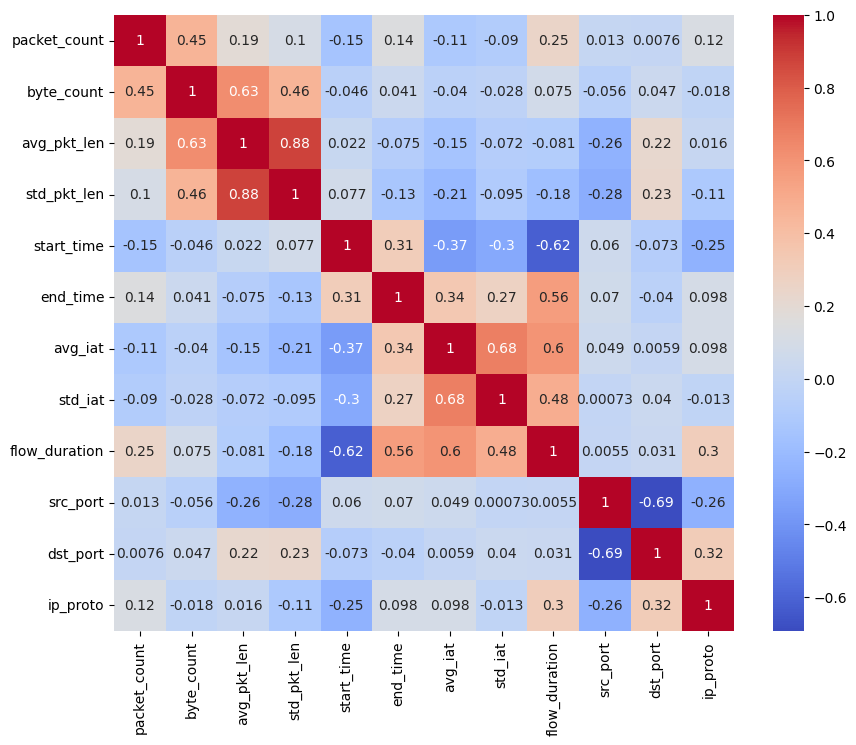

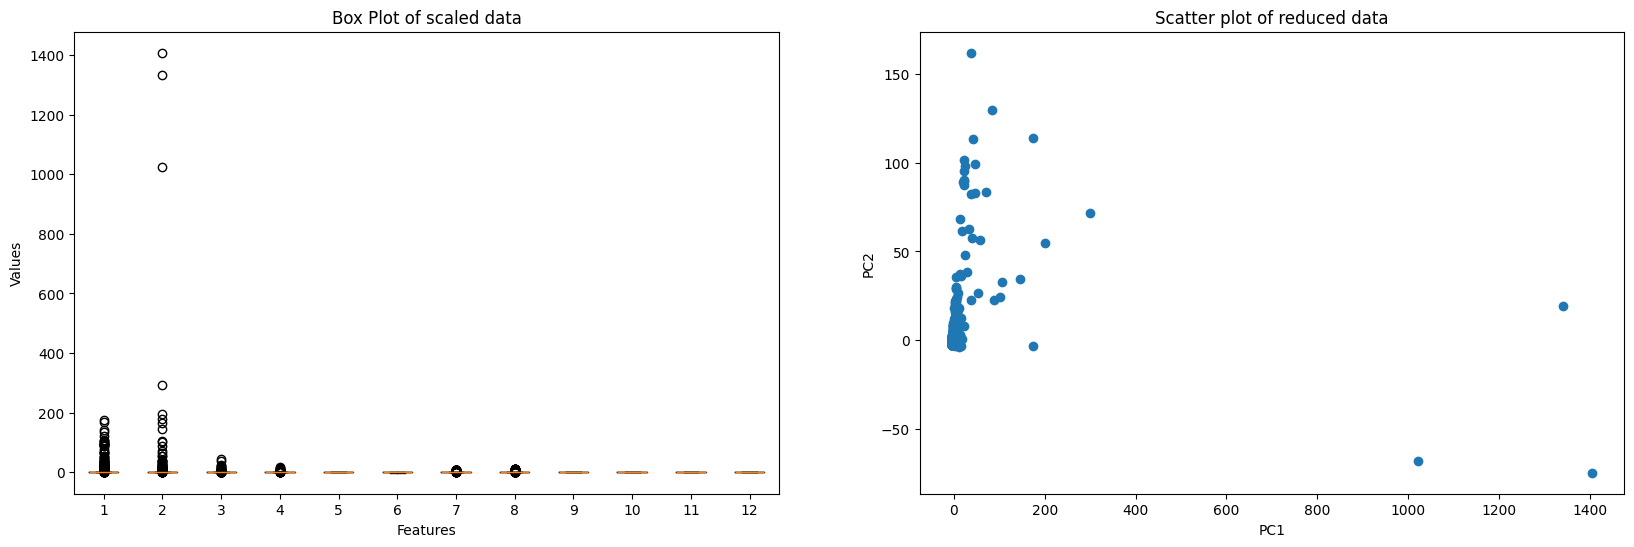

In [73]:
visualize_reduced_data(X_rscaled, X_rscaled_reduced)

# UMAP Implementation

In [79]:
import umap

X_umap = umap.UMAP(
    n_neighbors=30,
    min_dist=0.05,
    n_components=2,
    random_state=42,
    n_jobs=1
).fit_transform(X_sscaled_reduced)



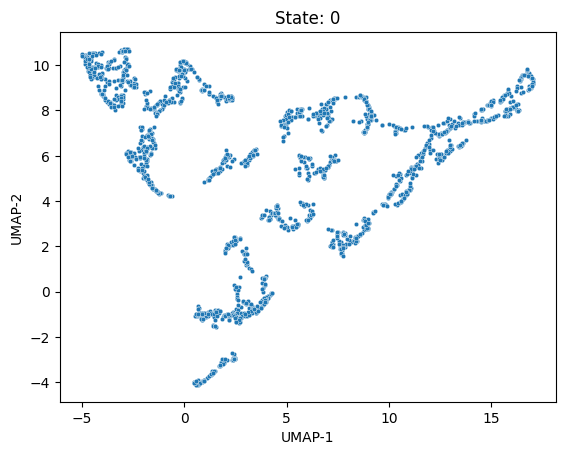

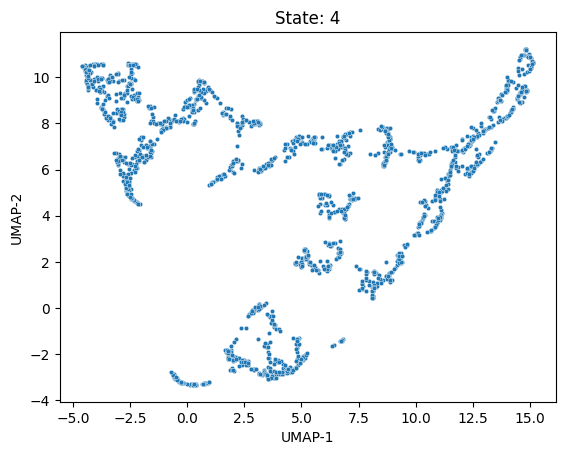

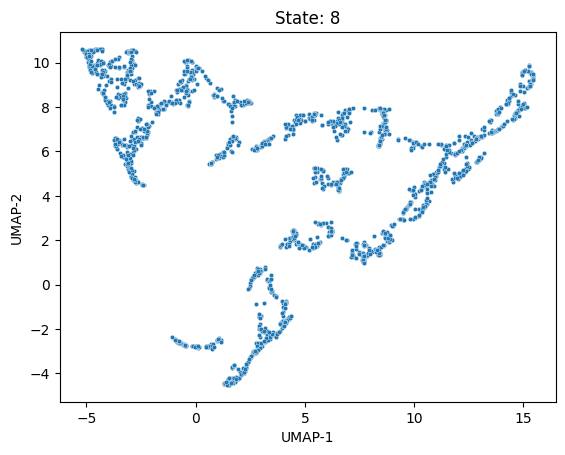

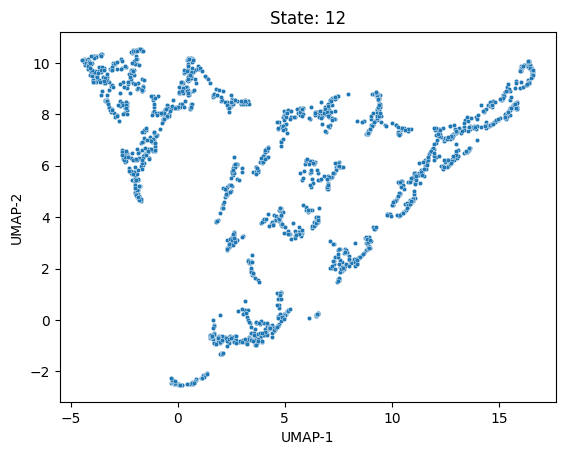

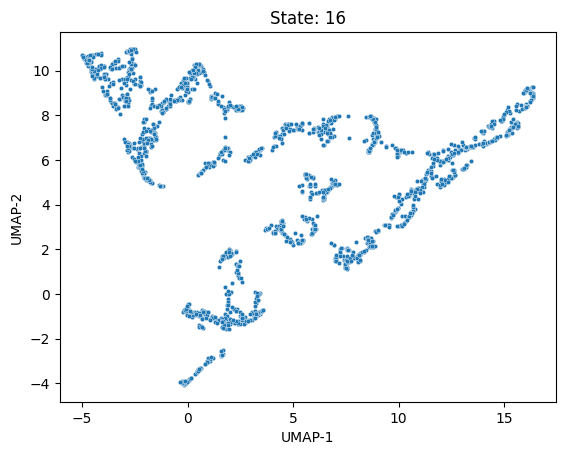

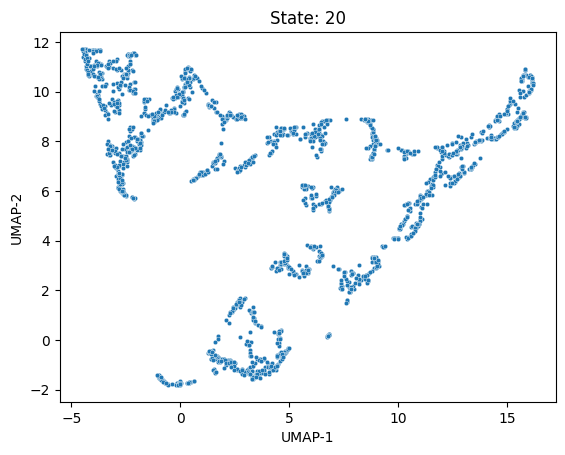

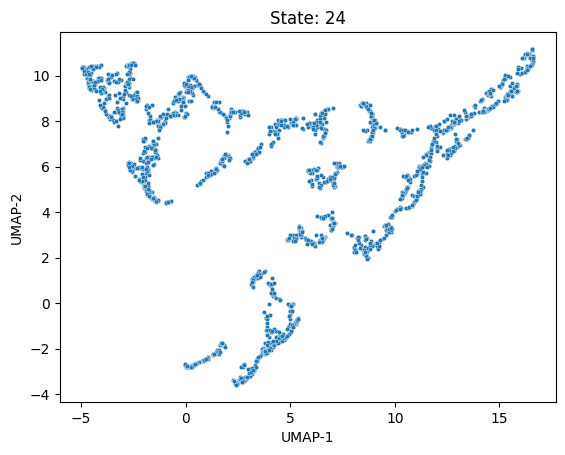

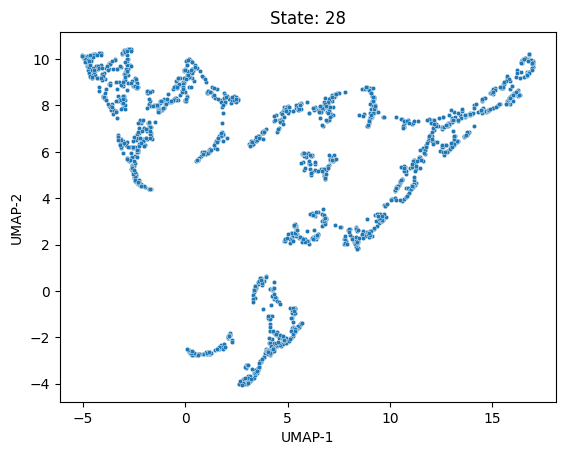

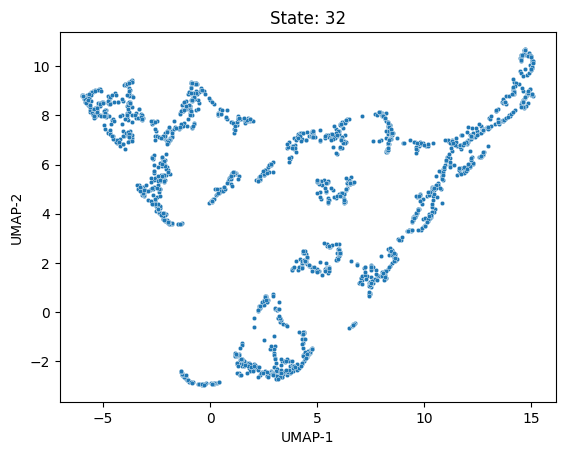

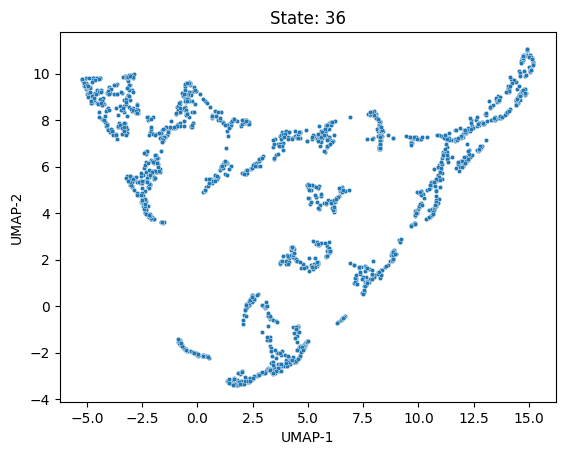

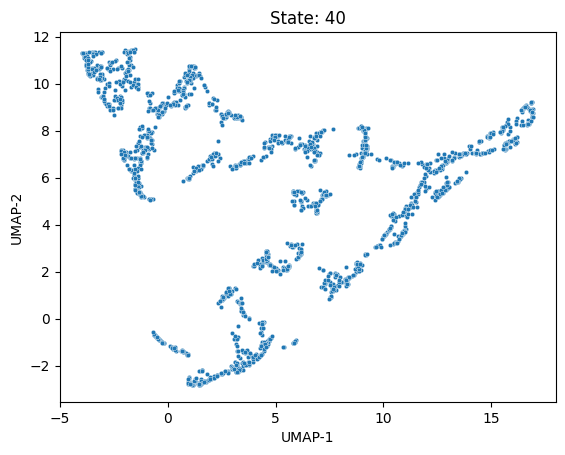

In [88]:
states = list(range(0, 42, 4))

def test_umap_consistency(states):
  for state in states:
    X_umap = umap.UMAP(
      n_neighbors=30,
      min_dist=0.05,
      n_components=2,
      random_state=state,
      n_jobs=1
    ).fit_transform(X_sscaled_reduced)

    sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], s=10)
    plt.title(f"State: {state}")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.show()

test_umap_consistency(states)

In [82]:
from sklearn.manifold import trustworthiness

score = trustworthiness(X_sscaled_reduced, X_umap, n_neighbors=30)
print(score)

0.9935962906114095


In [83]:

umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])

corr = pd.concat([X, umap_df], axis=1).corr()
corr.loc[X.columns, ['UMAP1', 'UMAP2']]

,UMAP1,UMAP2
packet_count,-0.170482,-0.069627
byte_count,-0.064153,-0.107269
avg_pkt_len,-0.169727,-0.496771
std_pkt_len,-0.119016,-0.597103
start_time,0.565570,-0.210307
end_time,-0.320893,0.404242
avg_iat,-0.594274,0.528907
std_iat,-0.525846,0.413708
flow_duration,-0.757988,0.517771
src_port,0.398540,0.606147


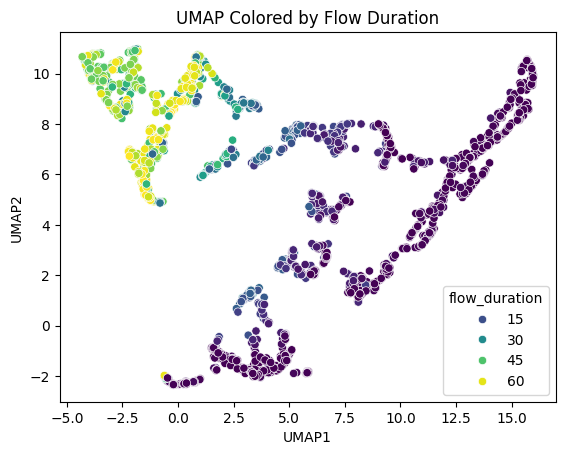

In [89]:
sns.scatterplot(x=umap_df['UMAP1'], y=umap_df['UMAP2'], hue=X['flow_duration'], palette='viridis')
plt.title("UMAP Colored by Flow Duration")
plt.show()